## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [2]:
!nvidia-smi

Sat Dec 23 13:20:35 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.13                 Driver Version: 537.13       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1050      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   40C    P3              N/A / ERR! |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [48]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\VGG_16_Dataset\test'
valid_path = r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\VGG_16_Dataset\train'


In [20]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [21]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [22]:
  # useful for getting number of output classes
folders = glob(r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\VGG_16_Dataset\test\*')

In [23]:
folders

['C:\\Users\\TEJKIRAN\\Desktop\\DataAnalytics_files\\VGG_16_Dataset\\test\\Cars',
 'C:\\Users\\TEJKIRAN\\Desktop\\DataAnalytics_files\\VGG_16_Dataset\\test\\Perfumes',
 'C:\\Users\\TEJKIRAN\\Desktop\\DataAnalytics_files\\VGG_16_Dataset\\test\\Real Estate',
 'C:\\Users\\TEJKIRAN\\Desktop\\DataAnalytics_files\\VGG_16_Dataset\\test\\Watches']

In [24]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [25]:
len(folders)

4

In [26]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [27]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [29]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [30]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\VGG_16_Dataset\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1925 images belonging to 4 classes.


In [31]:
test_set = test_datagen.flow_from_directory(r'C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\VGG_16_Dataset\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 400 images belonging to 4 classes.


In [32]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
61/61 [==============================] - 498s 8s/step - loss: 0.3709 - accuracy: 0.8665 - val_loss: 0.2303 - val_accuracy: 0.9175
Epoch 2/5
61/61 [==============================] - 288s 5s/step - loss: 0.1077 - accuracy: 0.9642 - val_loss: 0.0803 - val_accuracy: 0.9825
Epoch 3/5
61/61 [==============================] - 290s 5s/step - loss: 0.0726 - accuracy: 0.9766 - val_loss: 0.0821 - val_accuracy: 0.9800
Epoch 4/5
61/61 [==============================] - 297s 5s/step - loss: 0.0363 - accuracy: 0.9896 - val_loss: 0.0623 - val_accuracy: 0.9875
Epoch 5/5
61/61 [==============================] - 310s 5s/step - loss: 0.0205 - accuracy: 0.9958 - val_loss: 0.0621 - val_accuracy: 0.9875


In [33]:
import matplotlib.pyplot as plt

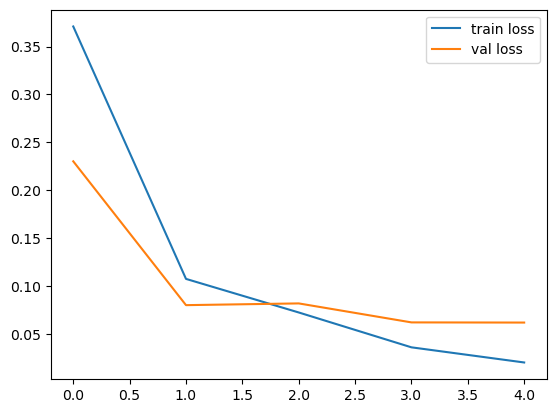

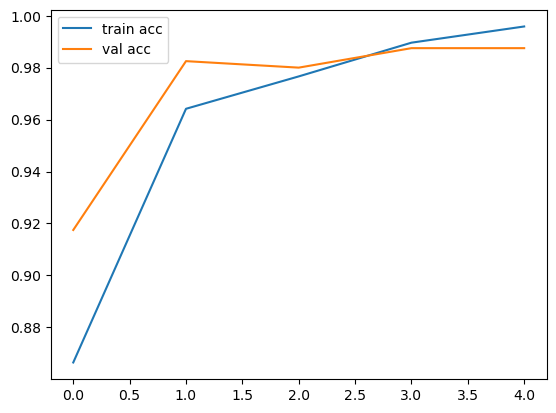

<Figure size 640x480 with 0 Axes>

In [34]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [35]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_cprw_vgg16.h5')

C:\Users\TEJKIRAN\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
y_pred = model.predict(test_set)

13/13 [==============================] - 47s 4s/step


In [37]:
y_pred

array([[9.6157640e-01, 6.1795115e-05, 3.4311182e-05, 3.8327534e-02],
       [9.6115553e-01, 1.4947924e-04, 1.0123197e-06, 3.8693901e-02],
       [2.0349764e-04, 7.1546477e-03, 9.9120295e-01, 1.4389603e-03],
       ...,
       [3.0183774e-08, 9.9999285e-01, 6.7885786e-08, 7.0531300e-06],
       [1.0710920e-06, 4.7859186e-07, 9.9999619e-01, 2.2250529e-06],
       [7.2400767e-06, 5.9041965e-01, 4.5773401e-03, 4.0499577e-01]],
      dtype=float32)

<b>Time for Prediction</b>

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model=load_model('model_cprw_vgg16.h5')

In [52]:
img=image.load_img(r"C:\Users\TEJKIRAN\Desktop\DataAnalytics_files\VGG_16_Dataset\test\Perfumes\55b63d47a2.jpg",target_size=(224,224))

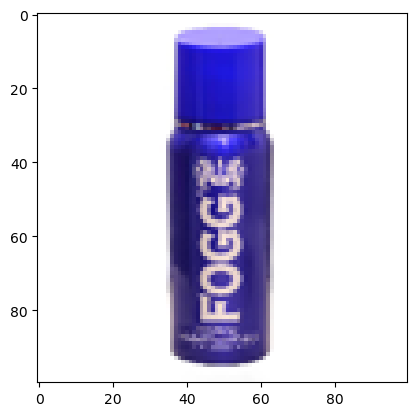

In [86]:
resized_img = img.resize((100, 100))

img_array = np.array(resized_img)

plt.imshow(img_array)
plt.show()

In [53]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [54]:
x.shape

(224, 224, 3)

In [55]:
x=x/255

In [56]:
x.shape

(224, 224, 3)

In [58]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 126ms/step


This is the image of a Perfume


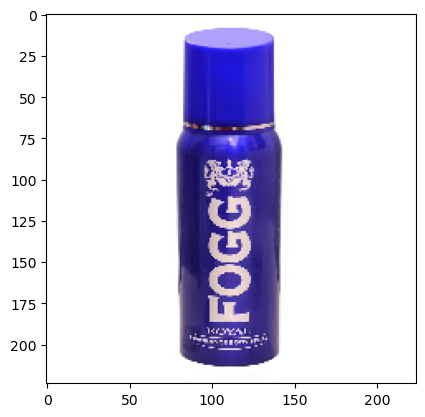

In [88]:
dic={0:'Car',1:'Perfume',2:'RealEstate',3:'Watch'}
if a==0:
    plt.imshow(img)
    print("This is the image of a {}".format(dic[int(a)]))
elif a==1:
    plt.imshow(img)
    print("This is the image of a {}".format(dic[int(a)]))
elif a==2:
    plt.imshow(img)
    print("This is the image of {}".format(dic[int(a)]))
elif a==3:
    plt.imshow(img)
    print("This is the image of a {}".format(dic[int(a)]))
else:
    print("Wrong Prediction")